Muhammed Enes Ugras

Nurten Ciftcioglu

## Steam Game Market Value Analysis

**Goal:** Predict a game's ***typical market list price*** using only pre-release metadata.

**Model Framing:** Given your game's pre-release metadata, here's the price that is typical for similar Steam games.

**Dataset:** Steam games dataset with ~111K games and 39 features


### 1. Setup & Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Dataset link: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset

# downloading dataset from link and added to project directory is easy and direct usage

# Kaggle Method 1: Download & Load
# Install dependencies: !pip install kagglehub
# import kagglehub
# path = kagglehub.dataset_download("fronkongames/steam-games-dataset")
# print("Path to dataset files:", path)
# df = pd.read_csv(f"{path}/games.csv")

# Kaggle Method 2: Direct Load
# Install dependencies: !pip install kagglehub
# import kagglehub
# from kagglehub import KaggleDatasetAdapter
# df = kagglehub.load_dataset(
#     KaggleDatasetAdapter.PANDAS,
#     "fronkongames/steam-games-dataset",
#     "games.csv",
# )

# COLAB
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/ml/ml_project_dataset/games.csv"


# LOCAL VERSION
# file_path = "games.csv"
# Load dataset
df = pd.read_csv(file_path)

print(f"Dataset loaded: {df.shape[0]:,} rows x {df.shape[1]} columns")
df.head()

Mounted at /content/drive
Dataset loaded: 111,452 rows x 39 columns


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Dataset Size:
- 111,452 samples × 39 features

Upon loading the dataset, we noticed that the first column appears to be the AppID stored as the index, which caused all column names to shift by one position. This is evident from seeing "DiscountDLC count" which looks like two columns merged together. We will fix this by properly reassigning column names.

In [ ]:
# Correct column names (39 columns total)
correct_columns = [
    'Name', 'Release date', 'Estimated owners', 'Peak CCU',
    'Required age', 'Price', 'Discount', 'DLC count', 'About the game',
    'Supported languages', 'Full audio languages', 'Reviews',
    'Header image', 'Website', 'Support url', 'Support email',
    'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url',
    'User score', 'Positive', 'Negative', 'Score rank', 'Achievements',
    'Recommendations', 'Notes', 'Average playtime forever',
    'Average playtime two weeks', 'Median playtime forever',
    'Median playtime two weeks', 'Developers', 'Publishers',
    'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'
]

# Apply correct column names
df.columns = correct_columns

print(f"Total columns: {len(df.columns)}")
print(f"\nColumn list:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2}. {col}")

Total columns: 39

Column list:
   1. Name
   2. Release date
   3. Estimated owners
   4. Peak CCU
   5. Required age
   6. Price
   7. Discount
   8. DLC count
   9. About the game
  10. Supported languages
  11. Full audio languages
  12. Reviews
  13. Header image
  14. Website
  15. Support url
  16. Support email
  17. Windows
  18. Mac
  19. Linux
  20. Metacritic score
  21. Metacritic url
  22. User score
  23. Positive
  24. Negative
  25. Score rank
  26. Achievements
  27. Recommendations
  28. Notes
  29. Average playtime forever
  30. Average playtime two weeks
  31. Median playtime forever
  32. Median playtime two weeks
  33. Developers
  34. Publishers
  35. Categories
  36. Genres
  37. Tags
  38. Screenshots
  39. Movies


Column names are corrected.

In [ ]:
# Preview: head, tail, random sample
print("=== First 3 rows ===")
display(df.head(3))

print("\n=== Last 3 rows ===")
display(df.tail(3))

print("\n=== Random 3 rows ===")
display(df.sample(3, random_state=42))

# Check duplicates
print("\n=== Duplicate Check ===")
print(f"Total duplicate rows: {df.duplicated().sum()}")
print(f"Duplicate Names: {df['Name'].duplicated().sum()}")

# The index contains AppID - check if unique
print("\n=== AppID (Index) Check ===")
print(f"Index is unique: {df.index.is_unique}")
print(f"Index range: {df.index.min()} to {df.index.max()}")

=== First 3 rows ===


,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...



=== Last 3 rows ===


,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
3265370,MosGhost,"Apr 1, 2025",0 - 20000,0,0,7.99,0,0,Story : Andrei moved to Moscow for work and re...,"['English', 'Russian', 'French', 'Italian', 'G...",...,0,0,0,Sinka Games,"Sinka Games,Arkuda Inc.","Single-player,Family Sharing",Simulation,"Simulation,Walking Simulator,Idler,First-Perso...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
3423620,AccuBow VR,"Mar 11, 2025",0 - 0,0,0,0.00,0,0,AccuBow VR: Master Realistic Archery in Immers...,['English'],...,0,0,0,AccuBow LLC,AccuBow LLC,"Single-player,Tracked Controller Support,VR On...","Action,Adventure,Free To Play",NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
3183790,Defense Of Fort Burton,"Apr 10, 2025",0 - 20000,0,0,9.99,0,0,Face series of battles defending the good peop...,['English'],...,0,0,0,Ledx,Ledx,"Single-player,Steam Achievements,Steam Cloud,S...","Action,Casual,Strategy,Early Access",NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...



=== Random 3 rows ===


,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
3222680,Reconquista,"Oct 10, 2024",0 - 0,0,0,0.00,0,0,Experience the Iberian Peninsula in the late R...,"['English', 'Korean', 'Simplified Chinese', 'J...",...,0,0,0,team_pf,team_pf,"Single-player,Multi-player,PvP,Shared/Split Sc...","Indie,Simulation,Strategy,Free To Play",NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
1042960,We Are The Caretakers,"Apr 22, 2021",0 - 20000,0,0,19.99,0,1,We Are The Caretakers is an afrofuturist squad...,"['English', 'French', 'German', 'Spanish - Spa...",...,0,0,0,Heart Shaped Games LLC,Heart Shaped Games LLC,"Single-player,Steam Achievements,Full controll...","Indie,RPG,Simulation,Strategy,Early Access","Early Access,Turn-Based Combat,Grand Strategy,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1106940,How to Raise a Wolf Girl,"Oct 11, 2019",0 - 20000,0,0,19.99,0,0,Story Kousaka Shuuji's life in the country is ...,"['English', 'Japanese', 'Traditional Chinese']",...,0,237,0,Sweet & Tea,Sekai Project,"Single-player,Steam Trading Cards","Casual,Indie,Simulation","Nudity,Sexual Content,Visual Novel,Anime,Matur...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...



=== Duplicate Check ===
Total duplicate rows: 6
Duplicate Names: 1126

=== AppID (Index) Check ===
Index is unique: True
Index range: 10 to 3671840


We found 6 exact duplicate rows and 1,126 games with duplicate names. The duplicate names are expected since different games can share the same title (e.g., remasters, different editions). The AppID, which serves as our unique identifier, has no duplicates.

We will remove the 6 duplicate rows later. It's worth noting that we should re-check for duplicates after dropping columns, since rows that only differ in dropped columns may become duplicates after those columns are removed.

Preview observations:
- Dataset includes release dates
- Some games have "0 - 0" estimated owners
- Tags column has NaN values

### 2. Problem Framing

Before diving into feature analysis, we need to frame our problem clearly:
- Is this a regression or classification task?
- How should we define the target variable?
- What is the scope of our model? Should we include free games or Early Access titles?
These decisions will guide all subsequent data processing choices.

In [ ]:
# Target Variable: Price
print("TARGET: Price")
df['Price'].describe()

TARGET: Price


,Price
count,111452.000000
mean,7.061568
std,12.563246
min,0.000000
25%,0.990000
50%,3.990000
75%,9.990000
max,999.980000


In [ ]:
# Free vs Paid breakdown
price_categories = pd.cut(df['Price'],
                          bins=[-0.01, 0, 5, 10, 20, 50, 1000],
                          labels=['Free', '$0-5', '$5-10', '$10-20', '$20-50', '$50+'])
price_categories.value_counts().sort_index()


,count
Price,
Free,23247
$0-5,43961
$5-10,22941
$10-20,15893
$20-50,4571
$50+,839


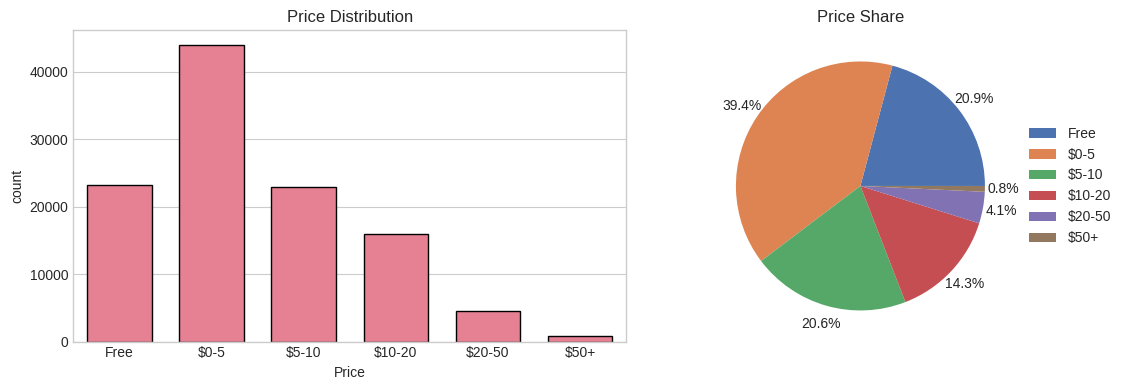

In [ ]:
# Price distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

counts = price_categories.value_counts().sort_index()
colors = sns.color_palette("deep", len(counts))

# Bar chart
sns.countplot(x=price_categories, ax=axes[0], order=counts.index, width=0.7, edgecolor='black')
axes[0].set_title('Price Distribution')

# Pie chart
axes[1].pie(counts.values, autopct='%1.1f%%', pctdistance=1.15, colors=colors)
axes[1].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].set_title('Price Share')

plt.tight_layout()

In [ ]:
# Discount analysis - is Price base price or discounted?
no_discount = (df['Discount'] == 0).sum()
with_discount = (df['Discount'] > 0).sum()
percentage_no_discount = no_discount / len(df) * 100

print(f"No discount: {no_discount:,} ({percentage_no_discount:.2f}%)")
print(f"With discount: {with_discount:,} ({100-percentage_no_discount:.2f}%)")

No discount: 108,961 (97.76%)
With discount: 2,491 (2.24%)


In [ ]:
# Check Genres for special categories
total = len(df)
early_access = df['Genres'].fillna('').str.contains('Early Access').sum()
free_to_play = df['Genres'].fillna('').str.contains('Free to Play').sum()

print(f"Early Access: {early_access:,} ({early_access/total*100:.2f}%)")
print(f"Free to Play: {free_to_play:,} ({free_to_play/total*100:.2f}%)")

Early Access: 13,938 (12.51%)
Free to Play: 7,920 (7.11%)


As we can see from the Price column statistics, the target variable ranges from $0 to \$999.98 with a mean of \$7.06 and median of \$3.99. Since the price is a continuous variable with a wide range of values, this problem is more suitable for a ***regression model*** rather than classification.

Looking at the price distribution, 20.9% of our games (23,247) are free games with Price=0. These games won't be helpful for predicting typical market price of paid games since they have fundamentally different monetization strategies. We should drop these free games from our training data.

The Discount column shows that 97.8% of games have Discount=0, meaning most prices represent the base price. However, for the remaining 2.2% that have active discounts, the current Price column shows discounted prices, not base prices. We should calculate the original base price for these games using the *Base = Price / (1 - Discount / 100)* formula later.

From the Genres column analysis, 13,938 games (12.5%) are marked as Early Access and 7,920 games (7.1%) have the "Free to Play" genre tag. The Free to Play games will be removed. For Early Access games, since they often have different pricing dynamics (typically lower prices for incomplete content), we should create an ***"is_early_access"*** feature to capture this effect rather than removing these games entirely.


### 3. Feature-by-Feature Processing


#### Target Variable: Price (& Discount)

Our goal is to predict the ***base market price*** (original value) of a game.
- The dataset contains current prices, which may be temporarily discounted.
- A temporary sale (e.g., 50% off) does not reflect the game's true market value/tier.
- Therefore, we must calcuate the ***original base price*** using the ***Discount*** column before analyzing the price further.
- After restoring the base price, the ***Discount*** column itself becomes irrelevant for price prediction and will be dropped.
- Price being 0 (Free) represents a different business model, so these will be filtered out.

In [ ]:
# Price & Discount Inspection to see stats of base price and discount
inspection_stats = pd.DataFrame({
    'Count': df[['Price', 'Discount']].count(),
    'Missing': df[['Price', 'Discount']].isna().sum(),
    'Dtype': df[['Price', 'Discount']].dtypes,
    'Negative Values': [(df[col] < 0).sum() for col in ['Price', 'Discount']],
    'Zeros (Free/No Discount)': [(df[col] == 0).sum() for col in ['Price', 'Discount']],
    'Positive Values': [(df[col] > 0).sum() for col in ['Price', 'Discount']],
    'Mean': df[['Price', 'Discount']].mean().round(2),
    'Median': df[['Price', 'Discount']].median().round(2),
    'Max': df[['Price', 'Discount']].max()
})
inspection_stats

,Count,Missing,Dtype,Negative Values,Zeros (Free/No Discount),Positive Values,Mean,Median,Max
Price,111452,0,float64,0,23247,88205,7.06,3.99,999.98
Discount,111452,0,int64,0,108961,2491,0.46,0.00,92.00


We will:
1.  Find the base price for discounted games using the discount percentage.
2.  Drop the Discount column
3.  Filter out games with Price == 0 (Free-to-Play).

In [ ]:
# 1. Taking before distribution
price_dist_before = pd.cut(df['Price'],
                           bins=[-0.01, 0, 5, 10, 20, 50, 1000],
                           labels=['Free', '$0-5', '$5-10', '$10-20', '$20-50', '$50+']).value_counts().sort_index()

In [ ]:
# 2. Calculating base price & removing discount
mask_discount = df['Discount'] > 0
# Formula: Base = Price / (1 - Discount/100)
df.loc[mask_discount, 'Price'] = (df.loc[mask_discount, 'Price'] / (1 - df.loc[mask_discount, 'Discount'] / 100)).round(2)
df.drop(columns=['Discount'], inplace=True)

# 3. Filtering out free games
df = df[df['Price'] > 0].copy()

In [ ]:
# 4. Taking after distribution
price_dist_after = pd.cut(df['Price'],
                          bins=[0, 5, 10, 20, 50, 1000],
                          labels=['$0-5', '$5-10', '$10-20', '$20-50', '$50+']).value_counts().sort_index()

pd.DataFrame({
    'Count': [len(df)],
    'Mean': [round(df['Price'].mean(), 2)],
    'Median': [round(df['Price'].median(), 2)],
    'Max': [df['Price'].max()]
}, index=['Price'])

,Count,Mean,Median,Max
Price,88205,8.97,5.39,999.98


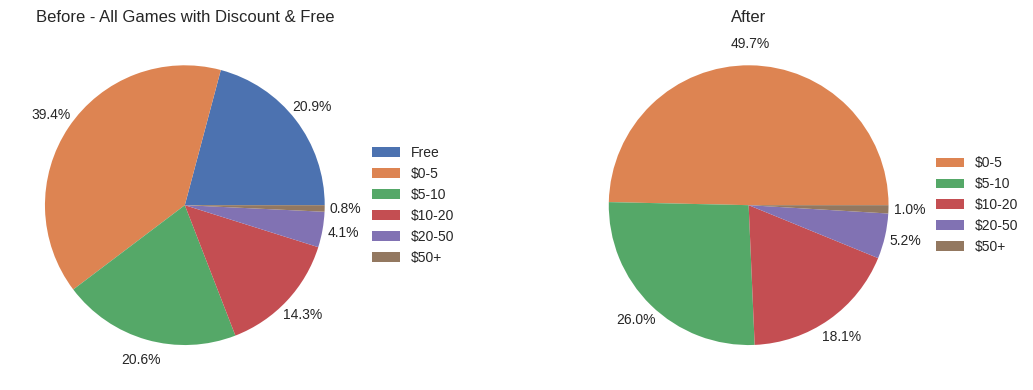

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

all_labels = ['Free', '$0-5', '$5-10', '$10-20', '$20-50', '$50+']
color_map = dict(zip(all_labels, sns.color_palette("deep", len(all_labels))))

# Before
colors_before = [color_map[label] for label in price_dist_before.index]
axes[0].pie(price_dist_before.values, autopct='%1.1f%%', pctdistance=1.15, colors=colors_before)
axes[0].legend(price_dist_before.index, loc='center left', bbox_to_anchor=(1, 0.5))
axes[0].set_title('Before - All Games with Discount & Free')

# After
colors_after = [color_map[label] for label in price_dist_after.index]
axes[1].pie(price_dist_after.values, autopct='%1.1f%%', pctdistance=1.15, colors=colors_after)
axes[1].legend(price_dist_after.index, loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].set_title('After')

plt.tight_layout()

After calculating base prices and removing free games, our dataset count decreased about 21%. Mean price increased from \$7.06 to \$8.97 and median increased from \$3.99 to \$5.39 because free games are no longer pulling the average down. The maximum price of \$999.98 remains unchanged and is clearly an outlier that we could cap during post-split pre-processing.

#### Release Date

Release date is pre-release information because developers set it when creating the Steam store listing, before the game goes on sale. Unlike post-release metrics, the release date is known at the time of listing.

We keep this column for two purposes:
1. **Feature extraction:** We can derive year, month, and day-of-week features
2. **Optional time-based split:** If we want to simulate real-world conditions where we train on older games and predict prices for newer games, we can split by date instead of randomly

For now, we will parse the date to datetime format and drop any rows with invalid/unparseable dates.

In [ ]:
#Inspecting release date column
release_col = df['Release date']
pd.DataFrame({
    'Dtype': [release_col.dtype],
    'Total': [len(release_col)],
    'Missing': [release_col.isna().sum()],
    'Empty Strings': [(release_col == '').sum()],
    'Unique Values': [release_col.nunique()]
}, index=['Release date'])

,Dtype,Total,Missing,Empty Strings,Unique Values
Release date,object,88205,0,0,4829


In [ ]:
# Parsing Release Date to datetime

df['Release date'] = pd.to_datetime(df['Release date'], format='%b %d, %Y', errors='coerce')

# Audit results
invalid_dates = df['Release date'].isna().sum()
future_dates = (df['Release date'] > pd.Timestamp.now()).sum()
oldest_date = df['Release date'].min()
newest_date = df['Release date'].max()

pd.DataFrame({
    'Value': [df['Release date'].dtype, invalid_dates, future_dates, oldest_date.strftime('%Y-%m-%d') if pd.notna(oldest_date) else 'N/A', newest_date.strftime('%Y-%m-%d') if pd.notna(newest_date) else 'N/A']
}, index=['Dtype', 'Invalid/Unparseable', 'Future Dates', 'Oldest', 'Newest']).T

,Dtype,Invalid/Unparseable,Future Dates,Oldest,Newest
Value,datetime64[ns],88,0,1997-06-30,2025-04-21


88 games have unparseable release dates. Since we need valid dates for time-based splitting and age filtering, we will drop these rows.

In [ ]:
# Droping rows with invalid release dates
before_count = len(df)
df = df[df['Release date'].notna()].copy()
after_count = len(df)

pd.DataFrame({
    'Value': [before_count, before_count - after_count, after_count]
}, index=['Before', 'Dropped (Invalid Dates)', 'After']).T

,Before,Dropped (Invalid Dates),After
Value,88205,88,88117


#### Estimated Owners


,count
Estimated owners,
0 - 0,6739
0 - 20000,65946
100000 - 200000,2118
1000000 - 2000000,399
10000000 - 20000000,24
20000 - 50000,6867
200000 - 500000,1715
2000000 - 5000000,248
20000000 - 50000000,9


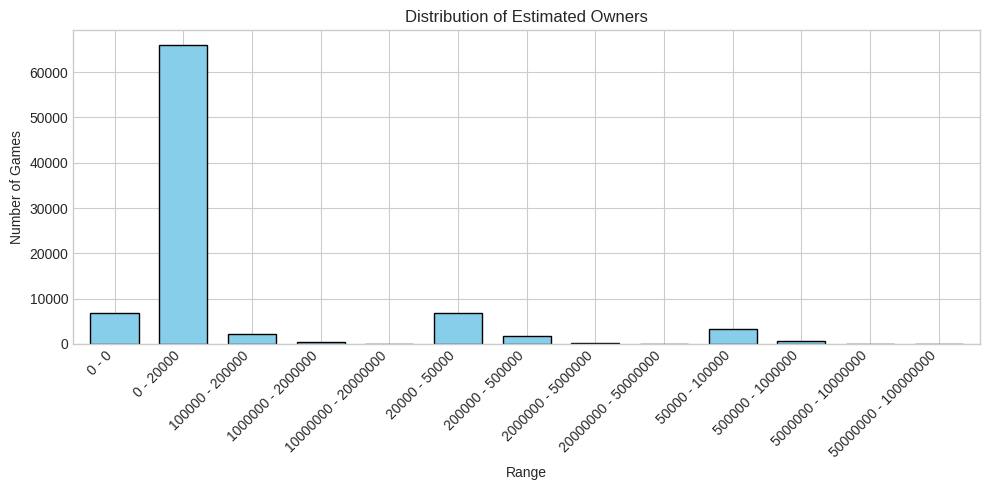

In [ ]:
# Inspecting estimated owners
owner_dist = df['Estimated owners'].value_counts().sort_index()

# Visualization
fig, ax = plt.subplots(figsize=(10, 5))
owner_dist.plot(kind='bar', ax=ax, edgecolor='black', width=0.7, color='skyblue')
ax.set_title('Distribution of Estimated Owners')
ax.set_xlabel('Range')
ax.set_ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

owner_dist


We aim to predict the market price for games that participate in the Steam economy. Games with ***0-0 estimated owners*** have effectively zero market presence or they failed to reach any audience or were abandoned. Including them would add noise (pricing data for products no one buys).

In [ ]:
# Removing games with zero market presence
before_count = len(df)

df = df[df['Estimated owners'] != '0 - 0'].copy()

df.drop(columns=['Estimated owners'], inplace=True)

pd.DataFrame({
    'Metric': ['Before Count', 'Dropped (Zero Market Presence)', 'After Count'],
    'Value': [before_count, before_count - len(df), len(df)]
})

,Metric,Value
0,Before Count,88117
1,Dropped (Zero Market Presence),6739
2,After Count,81378


We dropped all 6,739 games with ***"0 - 0"*** estimated owners because they represent games with no market presence. Additionally, we dropped the ***Estimated owners*** column entirely because they contain post-release information, which would cause data leakage since it's only known after release.

#### Genres


In [ ]:
# Inspecting Genres column
genres_col = df['Genres']

pd.DataFrame({
    'Metric': ['Dtype', 'Total', 'Missing (NaN)', 'Empty Strings', 'Unique Combinations'],
    'Value': [
        str(genres_col.dtype),
        len(genres_col),
        genres_col.isna().sum(),
        (genres_col == '').sum(),
        genres_col.nunique()
    ]
})

,Metric,Value
0,Dtype,object
1,Total,81378
2,Missing (NaN),56
3,Empty Strings,0
4,Unique Combinations,1782


In [ ]:
genres_col.value_counts().head(25)

,count
Genres,
"Casual,Indie",5337
"Action,Indie",4549
"Action,Adventure,Indie",4048
"Adventure,Indie",3412
"Adventure,Casual,Indie",2835
Casual,2675
"Action,Casual,Indie",2662
Indie,2635
Action,2392


From the inspection, we can see that ***Early Access*** appears as a genre tag within the comma separated strings. Since Early Access games often have different pricing dynamics (typically lower prices for incomplete content), we will extract this as a separate boolean feature called ***is_early_access***.

The Genres column has high cardinality with 1,782 unique combinations, and each game can have multiple genres . Because of this multi-label nature, we need to handle encoding carefully during post-split feature engineering, where each individual genre becomes a binary column.

There are 56 games with missing genres, which we will leave as NaN for now and handle during post-split imputation.

In [ ]:
# Creating is_early_access feature
df['is_early_access'] = df['Genres'].str.contains('Early Access', na=False)

pd.DataFrame({
    'Metric': ['is_early_access = True', 'is_early_access = False'],
    'Count': [df['is_early_access'].sum(), (~df['is_early_access']).sum()]
})

,Metric,Count
0,is_early_access = True,10480
1,is_early_access = False,70898


#### Tags


In [ ]:
# Inspecting Tags column
tags_col = df['Tags']

pd.DataFrame({
    'Metric': ['Dtype', 'Total', 'Missing (NaN)', 'Empty Strings', 'Unique Combinations'],
    'Value': [
        str(tags_col.dtype),
        len(tags_col),
        tags_col.isna().sum(),
        (tags_col == '').sum(),
        tags_col.nunique()
    ]
})

,Metric,Value
0,Dtype,object
1,Total,81378
2,Missing (NaN),15103
3,Empty Strings,0
4,Unique Combinations,60420


In [ ]:
tags_col.value_counts().head(15)

,count
Tags,
"Indie,Casual",282
"Action,Indie",253
"Adventure,Casual,Hidden Object",252
"Action,Indie,Casual",205
Casual,111
Indie,107
"Action,Indie,Adventure",98
"Action,Adventure,Indie",76
"Casual,Indie",70


The Tags column has similar structure to Genres but with significantly higher cardinality (60,420 unique combinations). There are also 15,103 missing values (18.6%), which is much higher than Genres' missing.

The top tag combinations have very low counts, probably tags are more granular and user-driven than official genres. We will keep this column for encoding during post-split feature engineering. Missing values will be handled in post-split imputation.

#### Categories

In [ ]:
# Inspecting Categories column
cat_col = df['Categories']

pd.DataFrame({
    'Metric': ['Dtype', 'Total', 'Missing (NaN)', 'Empty Strings', 'Unique Combinations'],
    'Value': [
        str(cat_col.dtype),
        len(cat_col),
        cat_col.isna().sum(),
        (cat_col == '').sum(),
        cat_col.nunique()
    ]
})

,Metric,Value
0,Dtype,object
1,Total,81378
2,Missing (NaN),864
3,Empty Strings,0
4,Unique Combinations,5602


In [ ]:
cat_col.value_counts().head(15)

,count
Categories,
Single-player,19474
"Single-player,Steam Achievements",7361
"Single-player,Family Sharing",4472
"Single-player,Steam Achievements,Steam Cloud",2803
"Single-player,Partial Controller Support",2268
"Single-player,Full controller support",1933
"Single-player,Steam Achievements,Full controller support",1889
"Single-player,Steam Achievements,Full controller support,Steam Cloud",1847
"Single-player,Steam Achievements,Family Sharing",1773


The Categories column contains game feature flags like Single-player, Steam Achievements, Steam Cloud, and Controller Support. It has cardinality (5,602 unique combinations) and 864 missing values (1.1%).

We will keep this column for encoding during post-split feature engineering. Missing values will be handled in post-split imputation.

#### Supported Languages & Full Audio Languages

In [ ]:
# Inspecting Supported Languages & Full Audio Languages
lang_cols = ['Supported languages', 'Full audio languages']

inspection = []
for col in lang_cols:
    inspection.append({
        'Column': col,
        'Dtype': str(df[col].dtype),
        'Missing': df[col].isna().sum(),
        'Empty Strings': (df[col] == '').sum(),
        'Unique': df[col].nunique()
    })

pd.DataFrame(inspection)

,Column,Dtype,Missing,Empty Strings,Unique
0,Supported languages,object,0,0,12468
1,Full audio languages,object,0,0,2398


In [ ]:
df['Supported languages'].value_counts().head(10)

,count
Supported languages,
['English'],41331
"['English', 'Russian']",2474
['Simplified Chinese'],1761
"['English', 'Simplified Chinese']",1719
"['English', 'Japanese']",1593
"['English', 'German']",725
"['English', 'Portuguese - Brazil']",709
"['English', 'French']",706
['Japanese'],598


In [ ]:
df['Full audio languages'].value_counts().head(10)

,count
Full audio languages,
[],46807
['English'],18426
"['English', 'Russian']",1360
"['English', 'Simplified Chinese']",1172
['Simplified Chinese'],809
['Japanese'],654
"['English', 'Spanish - Spain']",553
"['English', 'German']",521
"['English', 'Traditional Chinese']",514


Both language columns use list-like string format. There are no missing values for either column. Supported languages has 12,468 unique combinations with English-only being dominant. Full audio languages has 2,398 unique combinations, but notably 57.5% of games have an empty list, meaning no audio localization.

Since these list-like strings are complex for direct encoding, we will extract useful numeric and boolean features:
- ***supported_lang_count***: Number of supported languages
- ***audio_lang_count***: Number of audio languages
- ***has_audio***: Boolean and true if any audio language exists
- ***has_english_lang_support***: Boolean and true if English is in supported languages
- ***has_english_audio***: Boolean and true if English is in audio languages

These are safe to do before train/test split as they are deterministic.


In [ ]:
# Creating language features
# regex for parsing language lists
import re

def parse_language_list(s):
    """Parse list-like string to actual list, handling special characters"""
    if pd.isna(s) or s == '[]':
        return []
    matches = re.findall(r"'([^']*(?:''[^']*)*)'", s)
    if not matches:
        matches = re.findall(r'"([^"]*)"', s)
    return matches

df['_supported_list'] = df['Supported languages'].apply(parse_language_list)
df['_audio_list'] = df['Full audio languages'].apply(parse_language_list)

df['supported_lang_count'] = df['_supported_list'].apply(len)
df['audio_lang_count'] = df['_audio_list'].apply(len)
df['has_audio'] = df['audio_lang_count'] > 0
df['has_english_lang_support'] = df['_supported_list'].apply(lambda x: 'English' in x)
df['has_english_audio'] = df['_audio_list'].apply(lambda x: 'English' in x)

df.drop(columns=['_supported_list', '_audio_list'], inplace=True)

pd.DataFrame({
    'Feature': ['supported_lang_count', 'audio_lang_count', 'has_audio', 'has_english_lang_support', 'has_english_audio'],
    'Dtype': [df['supported_lang_count'].dtype, df['audio_lang_count'].dtype, df['has_audio'].dtype, df['has_english_lang_support'].dtype, df['has_english_audio'].dtype],
    'Mean/True%': [
        df['supported_lang_count'].mean().round(2),
        df['audio_lang_count'].mean().round(2),
        f"{df['has_audio'].mean()*100:.1f}%",
        f"{df['has_english_lang_support'].mean()*100:.1f}%",
        f"{df['has_english_audio'].mean()*100:.1f}%"
    ]
})

,Feature,Dtype,Mean/True%
0,supported_lang_count,int64,3.7
1,audio_lang_count,int64,1.0
2,has_audio,bool,42.5%
3,has_english_lang_support,bool,95.9%
4,has_english_audio,bool,38.1%


Now that we have extracted the useful features from the language columns, we can drop the original ***Supported languages*** and ***Full audio languages*** columns. The original list-like strings have extremely high cardinality (12,468 and 2,398 unique combinations), and while they could be encoded using multi-hot encoding, the resulting feature space would be very large. Instead, we choose to derive simpler, interpretable features that capture the essential information: language count, audio availability, and English availability.

In [ ]:
# Dropping original columns
df.drop(columns=['Supported languages', 'Full audio languages'], inplace=True)

#### Developers & Publishers

In [ ]:
# Inspecting Developers & Publishers
dev_pub_cols = ['Developers', 'Publishers']

inspection = []
for col in dev_pub_cols:
    inspection.append({
        'Column': col,
        'Dtype': str(df[col].dtype),
        'Missing': df[col].isna().sum(),
        'Empty Strings': (df[col] == '').sum(),
        'Unique': df[col].nunique()
    })

pd.DataFrame(inspection)

,Column,Dtype,Missing,Empty Strings,Unique
0,Developers,object,4,0,50362
1,Publishers,object,260,0,43947


In [ ]:
print("Top Developers:")
display(df['Developers'].value_counts().head(10))

print("\nTop Publishers:")
display(df['Publishers'].value_counts().head(10))

Top Developers:


,count
Developers,
EroticGamesClub,189
Choice of Games,164
Boogygames Studios,138
Creobit,136
Laush Dmitriy Sergeevich,129
Hosted Games,111
Sokpop Collective,105
"KOEI TECMO GAMES CO., LTD.",102
Reforged Group,96



Top Publishers:


,count
Publishers,
Big Fish Games,486
8floor,259
EroticGamesClub,189
Strategy First,184
HH-Games,177
Choice of Games,164
SEGA,159
Square Enix,154
Sekai Project,151


Both Developers and Publishers have extremely high cardinality (50,362 and 43,947 unique values). Most appear only once or twice, making encoding impractical.

Instead, we extract a more meaningful signal, whether a game is self-published. Self-published games (where Developer equals or contains Publisher, or Publisher is missing) likely have different pricing dynamics than games with separate publishers. This reduces 94k+ unique values to a single interpretable boolean feature.

In [ ]:
# Creating is_self_published feature
def check_self_published(row):
    dev = str(row['Developers']).strip().lower() if pd.notna(row['Developers']) else ''
    pub = str(row['Publishers']).strip().lower() if pd.notna(row['Publishers']) else ''

    if pub == '' or pub == 'nan':
        return True

    if dev == pub or dev in pub or pub in dev:
        return True

    return False

df['is_self_published'] = df.apply(check_self_published, axis=1)

pd.DataFrame({
    'Metric': ['is_self_published = True', 'is_self_published = False'],
    'Count': [df['is_self_published'].sum(), (~df['is_self_published']).sum()],
    '%': [f"{df['is_self_published'].mean()*100:.1f}%", f"{(~df['is_self_published']).mean()*100:.1f}%"]
})

,Metric,Count,%
0,is_self_published = True,61587,75.7%
1,is_self_published = False,19791,24.3%


Now that we have extracted the ***is_self_published*** feature, we can drop the original Developers and Publishers columns. The original columns have too many unique values to be useful for ML, and our derived feature captures the key business distinction.

In [ ]:
# Dropping original developer/publisher columns
df.drop(columns=['Developers', 'Publishers'], inplace=True)

In [ ]:
df.columns

Index(['Name', 'Release date', 'Peak CCU', 'Required age', 'Price',
       'DLC count', 'About the game', 'Reviews', 'Header image', 'Website',
       'Support url', 'Support email', 'Windows', 'Mac', 'Linux',
       'Metacritic score', 'Metacritic url', 'User score', 'Positive',
       'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Categories',
       'Genres', 'Tags', 'Screenshots', 'Movies', 'is_early_access',
       'supported_lang_count', 'audio_lang_count', 'has_audio',
       'has_english_lang_support', 'has_english_audio', 'is_self_published'],
      dtype='object')

#### Platform Flags (Windows, Mac, Linux)

These columns indicate which operating systems the game supports. Since platform compatibility is known before release and can influence pricing decisions, these are valid pre-release features.

In [ ]:
# Inspecting Platform Flags
platform_cols = ['Windows', 'Mac', 'Linux']

inspection = []
for col in platform_cols:
    inspection.append({
        'Column': col,
        'Dtype': str(df[col].dtype),
        'Missing': df[col].isna().sum(),
        'True/1': (df[col] == True).sum() if df[col].dtype == 'bool' else (df[col] == 1).sum(),
        'False/0': (df[col] == False).sum() if df[col].dtype == 'bool' else (df[col] == 0).sum()
    })

pd.DataFrame(inspection)

,Column,Dtype,Missing,True/1,False/0
0,Windows,bool,0,81355,23
1,Mac,bool,0,15402,65976
2,Linux,bool,0,11080,70298


All three platform flags are already boolean with no missing values. Nearly all games support Windows, while Mac and Linux support is less common. These columns are clean and ready to use as features.

#### Post-Release Metrics

The following columns contain information that is only available after a game is released: user reviews, playtime statistics, peak concurrent players, and ratings. Since we are building a pre-release pricing model, using these features would cause data leakage. We will drop all of them.

In [ ]:
# Identifying and dropping post-release columns
post_release_cols = [
    'Peak CCU',                    # Peak concurrent players
    'Positive',                    # Positive review count
    'Negative',                    # Negative review count
    'Recommendations',             # Steam recommendations
    'User score',                  # User rating
    'Score rank',                  # Ranking based on scores
    'Metacritic score',            # Review aggregator
    'Metacritic url',              # URL to reviews
    'Average playtime forever',    # User playtime
    'Average playtime two weeks',  # User playtime
    'Median playtime forever',     # User playtime
    'Median playtime two weeks',   # User playtime
    'Reviews'                      # Review text
]

existing_post_release = [c for c in post_release_cols if c in df.columns]

print(f"Post-release columns to drop: {len(existing_post_release)}")
for col in existing_post_release:
    print(f"  - {col}")

Post-release columns to drop: 13
  - Peak CCU
  - Positive
  - Negative
  - Recommendations
  - User score
  - Score rank
  - Metacritic score
  - Metacritic url
  - Average playtime forever
  - Average playtime two weeks
  - Median playtime forever
  - Median playtime two weeks
  - Reviews


In [ ]:
# Dropping post-release columns
df.drop(columns=existing_post_release, inplace=True)

print(f"\nDropped {len(existing_post_release)} post-release columns.")
print(f"Remaining columns: {len(df.columns)}")


Dropped 13 post-release columns.
Remaining columns: 27


In [ ]:
df.columns

Index(['Name', 'Release date', 'Required age', 'Price', 'DLC count',
       'About the game', 'Header image', 'Website', 'Support url',
       'Support email', 'Windows', 'Mac', 'Linux', 'Achievements', 'Notes',
       'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies',
       'is_early_access', 'supported_lang_count', 'audio_lang_count',
       'has_audio', 'has_english_lang_support', 'has_english_audio',
       'is_self_published'],
      dtype='object')

#### Numeric Features (Required Age, DLC Count, Achievements)

We need to determine which of these numeric columns are truly pre-release information. Required age is the age rating set during store submission, so it is known before the game goes on sale. DLC count represents downloadable content that is typically released after the main game, so it reflects post-release additions. Achievements are initially configured at launch, but can be added with updates and DLCs over time, making the current count potentially different from the launch-day count.

To avoid data leakage, we will keep Required age but drop DLC count and Achievements.

In [ ]:
# Inspecting Numeric Features
numeric_cols = ['Required age', 'DLC count', 'Achievements']

inspection = []
for col in numeric_cols:
    if col in df.columns:
        inspection.append({
            'Column': col,
            'Dtype': str(df[col].dtype),
            'Missing': df[col].isna().sum(),
            'Zeros': (df[col] == 0).sum(),
            'Mean': df[col].mean().round(2),
            'Max': df[col].max()
        })

pd.DataFrame(inspection)

,Column,Dtype,Missing,Zeros,Mean,Max
0,Required age,int64,0,79909,0.29,21
1,DLC count,int64,0,70125,0.49,2366
2,Achievements,int64,0,37335,20.91,9821


In [ ]:
# Dropping DLC count and Achievements
cols_to_drop = ['DLC count', 'Achievements']
df.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped: {cols_to_drop}")
print(f"Kept: Required age")

Dropped: ['DLC count', 'Achievements']
Kept: Required age


#### Text Fields (About the game, Reviews, Notes)

We have three text columns to evaluate. About the game is the developer's description written before release, so it is pre-release information. Reviews is user-generated content that only exists after release, so it must be dropped. Notes appears to be additional metadata that we need to inspect.

In [ ]:
# Inspecting Text Fields
text_cols = ['About the game', 'Reviews', 'Notes']

existing_text = [c for c in text_cols if c in df.columns]

inspection = []
for col in existing_text:
    inspection.append({
        'Column': col,
        'Dtype': str(df[col].dtype),
        'Missing': df[col].isna().sum(),
        'Empty Strings': (df[col] == '').sum(),
        'Avg Length': df[col].dropna().str.len().mean().round(0) if df[col].dtype == 'object' else None
    })

pd.DataFrame(inspection)

,Column,Dtype,Missing,Empty Strings,Avg Length
0,About the game,object,83,0,1275.0
1,Notes,object,66824,0,155.0


For this project, we will use a simple approach for text features. We extract the description length (word count) from the About the game column as a numeric feature, since longer descriptions might indicate more polished or higher-budget games. After extraction, we drop the original text column since raw text cannot be used directly in our tabular model. Notes column will be inspected and likely dropped as it appears to be sparse metadata.

In [ ]:
# Creatingdescription_length feature
df['description_length'] = df['About the game'].fillna('').str.split().str.len()

# Summary
pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Max', 'Zeros (empty)'],
    'Value': [
        df['description_length'].mean().round(1),
        df['description_length'].median(),
        df['description_length'].max(),
        (df['description_length'] == 0).sum()
    ]
})

,Metric,Value
0,Mean,212.1
1,Median,174.0
2,Max,8402.0
3,Zeros (empty),83.0


In [ ]:
# Dropping text columns
text_to_drop = ['About the game', 'Notes']
existing_to_drop = [c for c in text_to_drop if c in df.columns]
df.drop(columns=existing_to_drop, inplace=True)

df.columns.tolist()

['Name',
 'Release date',
 'Required age',
 'Price',
 'Header image',
 'Website',
 'Support url',
 'Support email',
 'Windows',
 'Mac',
 'Linux',
 'Categories',
 'Genres',
 'Tags',
 'Screenshots',
 'Movies',
 'is_early_access',
 'supported_lang_count',
 'audio_lang_count',
 'has_audio',
 'has_english_lang_support',
 'has_english_audio',
 'is_self_published',
 'description_length']

#### URL/Media Columns

The remaining columns contain URLs, email addresses, and paths to media assets like screenshots and trailers. While these are pre-release information set by developers, the raw URL strings themselves have no meaningful numeric or categorical value for machine learning. We could potentially derive simple features like whether a game has a website or how many screenshots it has, but for this project we will drop these columns to keep the feature set focused on more directly useful information.

In [ ]:
# Inspecting URL/Media Columns
url_cols = ['Header image', 'Website', 'Support url', 'Support email', 'Screenshots', 'Movies']
existing_url = [c for c in url_cols if c in df.columns]

inspection = []
for col in existing_url:
    inspection.append({
        'Column': col,
        'Missing': df[col].isna().sum(),
        'Empty': (df[col] == '').sum()
    })

pd.DataFrame(inspection)

,Column,Missing,Empty
0,Header image,0,0
1,Website,44717,0
2,Support url,42182,0
3,Support email,9609,0
4,Screenshots,9,0
5,Movies,2511,0


In [ ]:
# Dropping URL/Media columns
df.drop(columns=existing_url, inplace=True)
df.columns.tolist()

['Name',
 'Release date',
 'Required age',
 'Price',
 'Windows',
 'Mac',
 'Linux',
 'Categories',
 'Genres',
 'Tags',
 'is_early_access',
 'supported_lang_count',
 'audio_lang_count',
 'has_audio',
 'has_english_lang_support',
 'has_english_audio',
 'is_self_published',
 'description_length']

#### Identifiers (Name, AppID)

The Name column is a unique identifier for each game but has no predictive value for price. AppID is currently stored as the DataFrame index but is also not useful for prediction. We will drop Name and reset to a default numeric index for cleaner data handling.

In [ ]:
# Dropping Name and reset index
df.drop(columns=['Name'], inplace=True)
df.reset_index(drop=True, inplace=True)

df.head(3)

,Release date,Required age,Price,Windows,Mac,Linux,Categories,Genres,Tags,is_early_access,supported_lang_count,audio_lang_count,has_audio,has_english_lang_support,has_english_audio,is_self_published,description_length
0,2008-10-21,0,19.99,True,False,False,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",False,1,0,False,True,False,True,158
1,2017-10-12,0,0.99,True,True,False,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",False,10,0,False,True,False,False,87
2,2021-11-17,0,4.99,True,False,False,Single-player,"Action,Adventure,Indie,Strategy",NaN,False,2,0,False,True,False,True,111


### 4. Post-Processing

Now that all features are processed, we perform final verification steps before the train/test split.

In [ ]:
# Verify population filters
pd.DataFrame({
    'Metric': ['Total games', 'Min price', 'Max price'],
    'Value': [f"{len(df):,}", f"${df['Price'].min():.2f}", f"${df['Price'].max():.2f}"]
})

,Metric,Value
0,Total games,"81,378"
1,Min price,$0.29
2,Max price,$999.98


Minimum price is greater than \$0 as we can see from above, confirming that free games were removed.

In [ ]:
# Checking for duplicate rows after column drops
df.duplicated().sum()

np.int64(73)

We found 73 duplicate rows. This is more than the 6 exact duplicates found in earlier analysis because after dropping columns like Name and URLs, rows that previously differed only in those columns are now identical. These are removed.

In [ ]:
# Removing duplicates
before = len(df)
df.drop_duplicates(inplace=True)

pd.DataFrame({
    'Metric': ['Before', 'After', 'Removed'],
    'Count': [before, len(df), before - len(df)]
})

,Metric,Count
0,Before,81378
1,After,81305
2,Removed,73


In [ ]:
# Missing values summary for all features
pd.DataFrame({
    'Column': df.columns,
    'Missing': df.isnull().sum().values,
    '%': (df.isnull().sum().values / len(df) * 100).round(1)
})

,Column,Missing,%
0,Release date,0,0.0
1,Required age,0,0.0
2,Price,0,0.0
3,Windows,0,0.0
4,Mac,0,0.0
5,Linux,0,0.0
6,Categories,864,1.1
7,Genres,56,0.1
8,Tags,15054,18.5
9,is_early_access,0,0.0


Only three columns have missing values: Tags, Categories, and Genres. These are string columns that will be handled during post-split encoding. All numeric and boolean features are complete.

In [ ]:
# Final feature list with dtypes
pd.DataFrame({
    'Column': df.columns,
    'Dtype': df.dtypes.astype(str).values
})

,Column,Dtype
0,Release date,datetime64[ns]
1,Required age,int64
2,Price,float64
3,Windows,bool
4,Mac,bool
5,Linux,bool
6,Categories,object
7,Genres,object
8,Tags,object
9,is_early_access,bool


#### Price Scope Decision: Excluding Games Above $200

Our model predicts typical market price using pre-release metadata like genre, platform, developer type, and description length. Games priced above $200 represent a fundamentally different market segment where price is driven by factors our features cannot capture.

These high-priced listings typically fall into categories like collector's editions priced for bundled content like art books, mega-bundles containing complete franchise collections priced by quantity, joke or placeholder prices that are not real market prices, and ultra-niche simulators designed as professional training tools for tiny specialized audiences.

This follows the same logic as excluding free games. Free games use a different monetization model, and $200+ games use a different value proposition. Both fall outside the scope of predicting price for a typical consumer game based on its metadata.

Therefore, we remove games priced above $200 as a population filter before splitting.

In [ ]:
# Removing games priced above $200
before = len(df)
df = df[df['Price'] <= 200]

pd.DataFrame({
    'Metric': ['Before', 'After', 'Removed'],
    'Count': [before, len(df), before - len(df)]
})

,Metric,Count
0,Before,81305
1,After,81298
2,Removed,7


In [ ]:
# Final dataset shape
df.shape

(81298, 17)

Dataset is ready for train/test split with 81,298 games and 17 columns.

#### Saving Cleaned Dataset

We save the pre-split cleaned dataset for use in the next notebook. This data has been filtered and cleaned but not yet split into train/test sets.

In [ ]:
# Saving cleaned dataset for next notebook
# df.to_csv('cleaned_presplit_games_data.csv', index=False)

# If in Colab and you want it in Drive, uncomment and provide your path:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/ml/ml_project_dataset/cleaned_presplit_games_data.csv", index=False)
df.shape

(81298, 17)